# Projet AirBnB - Prétraitement des Données (Side Quest)
### Ce notebook a pour objectif de préparer le dataset pour la prédiction du prix d'un logement sur Airbnb.
### Il est structuré en plusieurs sections : chargement et exploration des données, prétraitement, et séparation des données pour une future modélisation.
### Chaque membre pourra compléter sa partie en fonction de son rôle.

 ## Table des Matières
### 1. Introduction
### 2. Chargement et Exploration des Données
### 3. Prétraitement des Données
###    - 3.1 Sélection des Colonnes Pertinentes
###    - 3.2 Suppression des Doublons
###    - 3.3 Gestion des Valeurs Manquantes
###    - 3.4 Conversion des Types de Données
###    - 3.5 Gestion des Valeurs Aberrantes
### 4. Séparation des Données (Train/Test Split)
### 5. Bonus: Préparation pour la Régression Linéaire
### 6. Conclusion et Perspectives


## 1. Introduction
### Dans ce projet, nous préparons le dataset AirBnB afin de prédire le prix des logements.
### Ce notebook se concentre sur la partie prétraitement des données avant l'application des algorithmes de prédiction.
### Chaque membre de l'équipe pourra ajouter des analyses ou des ajustements au fur et à mesure.


In [326]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

%matplotlib inline

In [327]:
import sys
print(sys.executable)

c:\Users\Kraich\anaconda3\python.exe


 ## 2. Chargement et Exploration des Données
### Charger le fichier CSV et effectuer une première exploration du dataset.

In [328]:
# TODO: Remplacer le chemin par le chemin de votre fichier CSV si nécessaire
file_path = 'listings.csv.gz'
df = pd.read_csv(file_path)

# Affichage des premières lignes du dataset
#print(df.head())

# Informations générales sur le dataset
#print(df.info())

# Statistiques descriptives
print(df.describe())


                 id     scrape_id       host_id  host_listings_count  \
count  9.103100e+04  9.103100e+04  9.103100e+04         91022.000000   
mean   6.081553e+17  2.024121e+13  1.818846e+08            30.396596   
std    5.127971e+17  3.728536e+01  2.006094e+08           127.009105   
min    3.109000e+03  2.024121e+13  2.626000e+03             0.000000   
25%    3.233102e+07  2.024121e+13  1.956359e+07             1.000000   
50%    8.113895e+17  2.024121e+13  7.262684e+07             1.000000   
75%    1.092549e+18  2.024121e+13  3.394154e+08             3.000000   
max    1.305100e+18  2.024121e+13  6.654112e+08          7663.000000   

       host_total_listings_count  neighbourhood_group_cleansed      latitude  \
count               91022.000000                           0.0  91031.000000   
mean                   38.665465                           NaN     48.864181   
std                   159.747472                           NaN      0.018198   
min                     0.00000

 ## 3. Prétraitement des Données
### Dans cette section, nous allons préparer le dataset pour l'analyse.
### Cette partie est à compléter par les membres de l'équipe selon les besoins.

## 3.1 Sélection des Colonnes Pertinentes
### Sélectionner les colonnes jugées importantes pour la prédiction du prix.

In [329]:
# TODO: Adapter la liste des colonnes en fonction de vos besoins
colonnes_pertinentes = ['price', 'room_type', 'neighbourhood', 'minimum_nights', 'number_of_reviews']
df = df[colonnes_pertinentes]
# Vérification de la sélection
print(df.head())

     price        room_type            neighbourhood  minimum_nights  \
0  $100.00  Entire home/apt  Neighborhood highlights               2   
1   $88.00  Entire home/apt  Neighborhood highlights               3   
2  $136.00  Entire home/apt                      NaN              10   
3      NaN  Entire home/apt                      NaN               7   
4   $75.00  Entire home/apt                      NaN             180   

   number_of_reviews  
0                  4  
1                425  
2                367  
3                  5  
4                  0  


## 3.2 Suppression des Doublons
### Identifier et supprimer les doublons dans le dataset.

In [330]:

df_cleaned = df.drop_duplicates(subset=['price', 'room_type', 'neighbourhood', 'minimum_nights', 'number_of_reviews'], keep='first')

print(df_cleaned)

print("Doublons avant suppression :", df.duplicated().sum())
print("Doublons après suppression :", df_cleaned.duplicated().sum())



         price        room_type            neighbourhood  minimum_nights  \
0      $100.00  Entire home/apt  Neighborhood highlights               2   
1       $88.00  Entire home/apt  Neighborhood highlights               3   
2      $136.00  Entire home/apt                      NaN              10   
3          NaN  Entire home/apt                      NaN               7   
4       $75.00  Entire home/apt                      NaN             180   
...        ...              ...                      ...             ...   
91004   $76.00  Entire home/apt                      NaN               7   
91007   $64.00  Entire home/apt  Neighborhood highlights               1   
91017   $56.00  Entire home/apt  Neighborhood highlights               1   
91028  $818.00  Entire home/apt  Neighborhood highlights               1   
91029  $840.00  Entire home/apt  Neighborhood highlights               1   

       number_of_reviews  
0                      4  
1                    425  
2     

## 3.3 Gestion des Valeurs Manquantes
### Identifier et traiter les valeurs manquantes.


In [331]:
df_cleaned = df_cleaned.copy()

df_cleaned['price'] = df_cleaned['price'].replace({r'\$': '', r',': ''}, regex=True).astype(float)

df_cleaned['price'] = df_cleaned['price'].fillna(df_cleaned['price'].mean())

# Replace NaN values in 'neighbourhood' column without using inplace=True
df_cleaned['neighbourhood'] = df_cleaned['neighbourhood'].fillna('Pas de neighbourhood')

print(df_cleaned.isnull().sum())

price                0
room_type            0
neighbourhood        0
minimum_nights       0
number_of_reviews    0
dtype: int64


 # 3.4 Conversion des Types de Données
### Convertir les colonnes en types appropriés, par exemple convertir 'price' en numérique.

In [332]:
# 1. Encodage des variables catégorielles
label_encoder = LabelEncoder()

df_cleaned['room_type_encoded'] = label_encoder.fit_transform(df_cleaned['room_type'])
df_cleaned['neighbourhood_encoded'] = label_encoder.fit_transform(df_cleaned['neighbourhood'])

# Vérification de l'encodage
df_cleaned[['room_type', 'room_type_encoded', 'neighbourhood', 'neighbourhood_encoded']].head()


,room_type,room_type_encoded,neighbourhood,neighbourhood_encoded
0,Entire home/apt,0,Neighborhood highlights,0
1,Entire home/apt,0,Neighborhood highlights,0
2,Entire home/apt,0,Pas de neighbourhood,1
3,Entire home/apt,0,Pas de neighbourhood,1
4,Entire home/apt,0,Pas de neighbourhood,1


In [333]:
# SUPPRESSION DES COLONNES INUTILES
df_cleaned = df_cleaned.drop(columns=['room_type', 'neighbourhood'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42916 entries, 0 to 91029
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  42916 non-null  float64
 1   minimum_nights         42916 non-null  int64  
 2   number_of_reviews      42916 non-null  int64  
 3   room_type_encoded      42916 non-null  int32  
 4   neighbourhood_encoded  42916 non-null  int32  
dtypes: float64(1), int32(2), int64(2)
memory usage: 1.6 MB


### Normalisation des données.  transformation des données pour qu'elles aient une moyenne de 0 et un écart-type de 1

In [334]:
scaler = StandardScaler()
df_cleaned[['price','minimum_nights', 'number_of_reviews']] = scaler.fit_transform(df_cleaned[['price','minimum_nights', 'number_of_reviews']])

# Vérification après normalisation
df_cleaned.describe()

,price,minimum_nights,number_of_reviews,room_type_encoded,neighbourhood_encoded
count,4.291600e+04,4.291600e+04,4.291600e+04,42916.000000,42916.000000
mean,2.649055e-18,7.947165e-18,2.649055e-17,0.276028,0.420659
std,1.000012e+00,1.000012e+00,1.000012e+00,0.694885,0.493671
min,-4.757841e-01,-2.405323e-01,-5.282480e-01,0.000000,0.000000
25%,-2.898221e-01,-2.210107e-01,-4.887713e-01,0.000000,0.000000
50%,-1.731012e-01,-2.014890e-01,-3.177053e-01,0.000000,0.000000
75%,0.000000e+00,-1.819673e-01,6.390336e-02,0.000000,1.000000
max,5.965127e+01,1.926161e+01,4.468580e+01,3.000000,1.000000


# 3.5 Gestion des Valeurs Aberrantes
### Détecter et gérer les valeurs aberrantes à l'aide de visualisations. 
##### j'ai utiliser z-score a voir si on switch vers IQR pour les boxplots // PAS LE MEME NOMBRE DE VALEURS ABERRANTES 

Nombre de valeurs aberrantes détectées : 2047


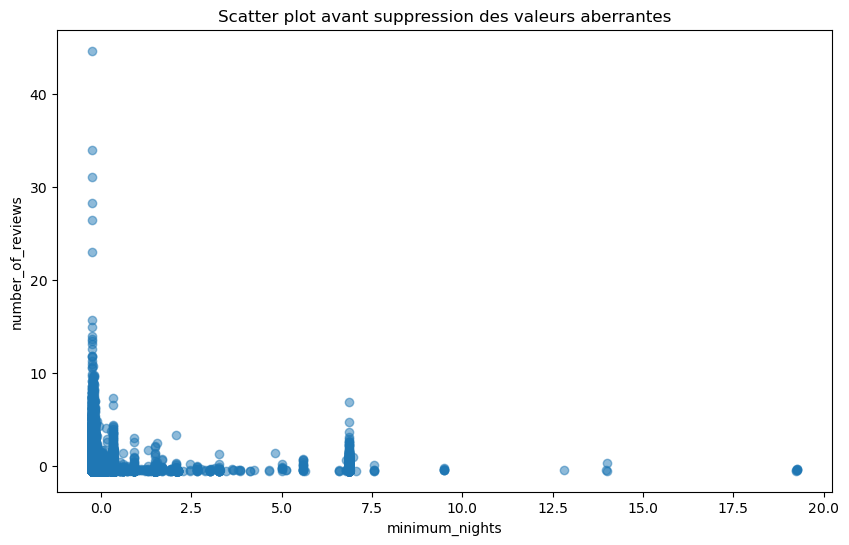

In [335]:
z_scores = np.abs(df_cleaned[['price','minimum_nights', 'number_of_reviews']])
outliers = (z_scores > 3).any(axis=1)  # Détecte les lignes où au moins une colonne dépasse le seuil

# Afficher les valeurs aberrantes
print(f"Nombre de valeurs aberrantes détectées : {outliers.sum()}")

#plt.figure(figsize=(10, 6))
#sns.boxplot(data=df_cleaned[['minimum_nights', 'number_of_reviews']])
#plt.title('Valeur aberrantes dans minimum_nights et number_of_reviews')
#plt.show()

# Scatter plot pour visualiser les données
plt.figure(figsize=(10, 6))
plt.scatter( df_cleaned['minimum_nights'], df_cleaned['number_of_reviews'], alpha=0.5)
plt.title('Scatter plot avant suppression des valeurs aberrantes')
plt.xlabel('minimum_nights')
plt.ylabel('number_of_reviews')
plt.show()

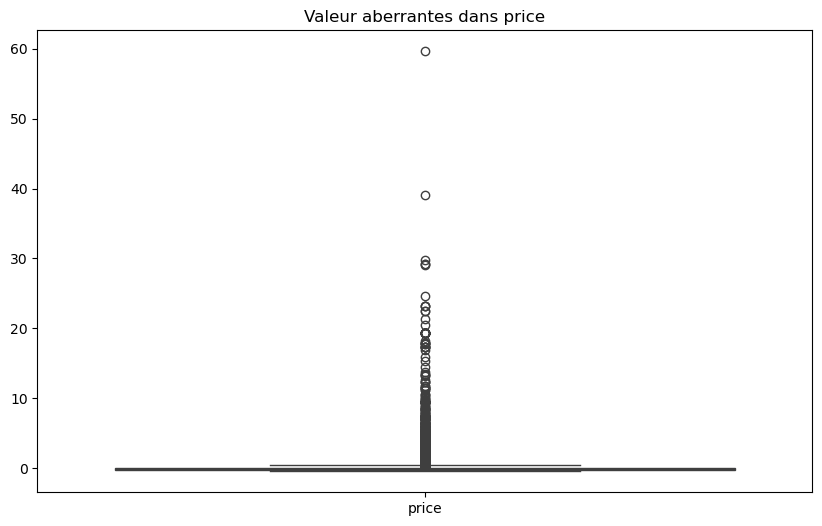

In [336]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned[['price']])
plt.title('Valeur aberrantes dans price')
plt.show()

Dimensions avant suppression : (42916, 5)
Dimensions après suppression : (40869, 5)
Nombre de valeurs aberrantes restantes : 0


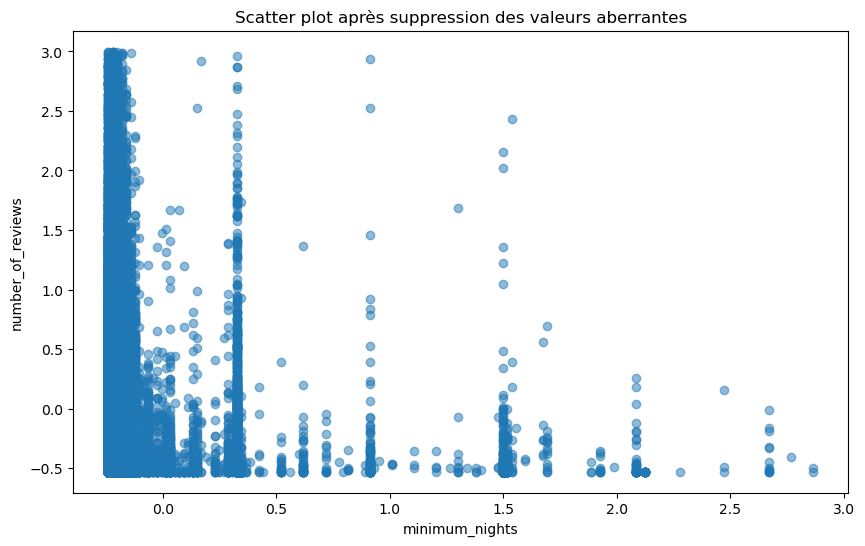

In [337]:
# Suppression des valeurs aberrantes
df_cleaned_no_outliers = df_cleaned.loc[~outliers]

# Vérifiez les dimensions après suppression
print(f"Dimensions avant suppression : {df_cleaned.shape}")
print(f"Dimensions après suppression : {df_cleaned_no_outliers.shape}")

# Vérifiez si des valeurs aberrantes subsistent
z_scores_no_outliers = np.abs(df_cleaned_no_outliers[['price','minimum_nights', 'number_of_reviews']])
outliers_remaining = (z_scores_no_outliers > 3).any(axis=1)
print(f"Nombre de valeurs aberrantes restantes : {outliers_remaining.sum()}")

#plt.figure(figsize=(10, 6))
#sns.boxplot(data=df_cleaned_no_outliers[['minimum_nights', 'number_of_reviews']])
#plt.title('Valeur aberrantes dans minimum_nights et number_of_reviews')
#plt.show()

# Scatter plot pour visualiser les données
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned_no_outliers['minimum_nights'], df_cleaned_no_outliers['number_of_reviews'], alpha=0.5)
plt.title('Scatter plot après suppression des valeurs aberrantes')
plt.xlabel('minimum_nights')
plt.ylabel('number_of_reviews')
plt.show()

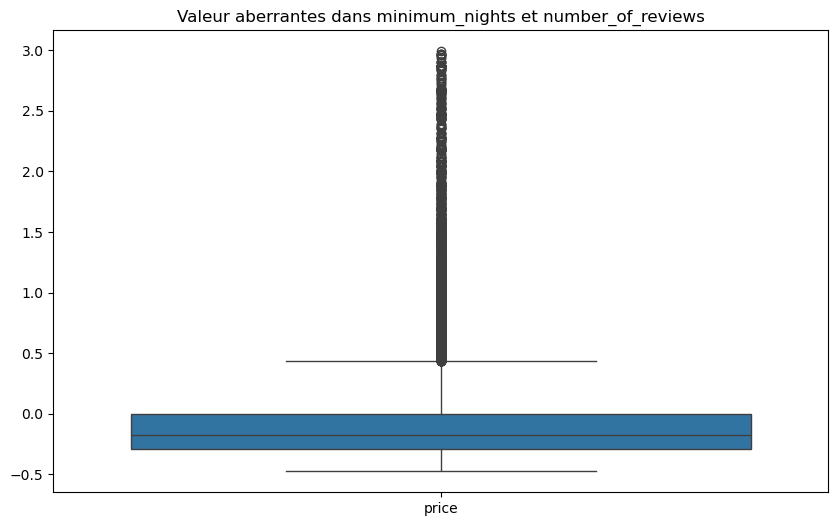

In [338]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned_no_outliers[['price']])
plt.title('Valeur aberrantes dans minimum_nights et number_of_reviews')
plt.show()

 # 4. Séparation des Données (Train/Test Split)
### Préparer le dataset pour la modélisation en séparant les données en ensemble d'entraînement et de test.


# 5. Bonus: Préparation pour la Régression Linéaire
### Placeholder pour la future implémentation d'une régression linéaire.
### Cette section pourra être complétée ultérieurement avec la modélisation et l'évaluation.

# 6. Conclusion et Perspectives

### Ce notebook constitue la base du prétraitement des données pour le projet AirBnB.
### Chaque membre pourra ajuster ou compléter les sections selon l'évolution du projet.
### Pensez à ajouter des commentaires et des visualisations pertinentes pour documenter vos choix.